# Libraries

In [57]:
# Basics
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
sns.set_style('darkgrid')

# Others
import openpyxl
import xlrd
import os
import io
import warnings
import statistics

# Dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import (calculate_bartlett_sphericity,
                                             calculate_kmo,
                                             chi2)

In [58]:
# Metrics from Sklearn
from sklearn import metrics
from sklearn import set_config
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Models Regression from Sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [59]:
# Regression
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [60]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category = FutureWarning)
warnings.filterwarnings("ignore", category = UserWarning)

In [61]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
set_config(display="text")  # displays text representation of estimators
plt.rcParams["figure.figsize"] = [7.2, 4.8]

# Input Dataset for Model

In [62]:
# Dados dos empregados com vinculo ativo em 31/12 apenas da industria da transformação do ano de 2021
df_ind_trans = pd.read_csv(r"DF_Industria_tranformacao_2021.csv", sep=";", encoding='UTF-8', low_memory=False)
df_ind_trans.shape

(1146857, 24)

In [63]:
df_ind_trans.head()

,id,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade_após_2005,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_2.0_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_
0,0,7,6,3,1,44,50,1,0,0,4,1372.730,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986
1,1,7,1,6,1,1,61,0,0,20,2,1340.190,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
2,2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867
3,3,4,6,3,1,44,28,1,0,0,2,2083.360,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877
4,4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046


In [64]:
df_ind_trans = df_ind_trans.rename(columns={'Escolaridade_após_2005': 'Escolaridade', 'CNAE_2.0_Subclasse_targetencoder_': 'CNAE_Subclasse_targetencoder_'})

# Split Dataset into Train and Test

In [65]:
df_model = df_ind_trans.sample(frac = 0.5)
df_model.shape

(573428, 24)

In [66]:
df_seleted = df_model[['id']]
df_seleted['Select'] = 1
df_seleted.shape

C:\Users\luand\AppData\Local\Temp\ipykernel_22508\3788505534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seleted['Select'] = 1


(573428, 2)

In [67]:
df_ind_trans = df_ind_trans.merge(df_seleted, on=['id'], how='left')
df_ind_trans['Select'] = df_ind_trans['Select'].fillna(0)
df_ind_trans.head()

,id,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_,Select
0,0,7,6,3,1,44,50,1,0,0,4,1372.730,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986,1.000
1,1,7,1,6,1,1,61,0,0,20,2,1340.190,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,1.000
2,2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,0.000
3,3,4,6,3,1,44,28,1,0,0,2,2083.360,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877,1.000
4,4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046,1.000


In [68]:
df_ind_trans['Select'].value_counts()

Select
0.000    573429
1.000    573428
Name: count, dtype: int64

# Checking the balance of the dataset

In [69]:
lst_features = df_ind_trans.columns.tolist()
lst_features.remove('id')
lst_features.remove('Select')
lst_features

['Faixa_Etária',
 'Faixa_Hora_Contrat',
 'Faixa_Tempo_Emprego',
 'Escolaridade',
 'Qtd_Hora_Contr',
 'Idade',
 'Ind_Simples',
 'Ind_Portador_Defic',
 'Qtd_Dias_Afastamento',
 'Raça_Cor',
 'Vl_Remun_Dezembro_Nom',
 'Sexo_Trabalhador',
 'Tamanho_Estabelecimento',
 'Tempo_Emprego',
 'Tipo_Admissão',
 'Tipo_Defic',
 'Ind_Trab_Intermitente',
 'Ind_Trab_Parcial',
 'CNAE_Subclasse_targetencoder_',
 'Tipo_Vínculo_targetencoder_',
 'IBGE_Subsetor_targetencoder_',
 'CBO_targetencoder_',
 'cidades_targetencoder_']

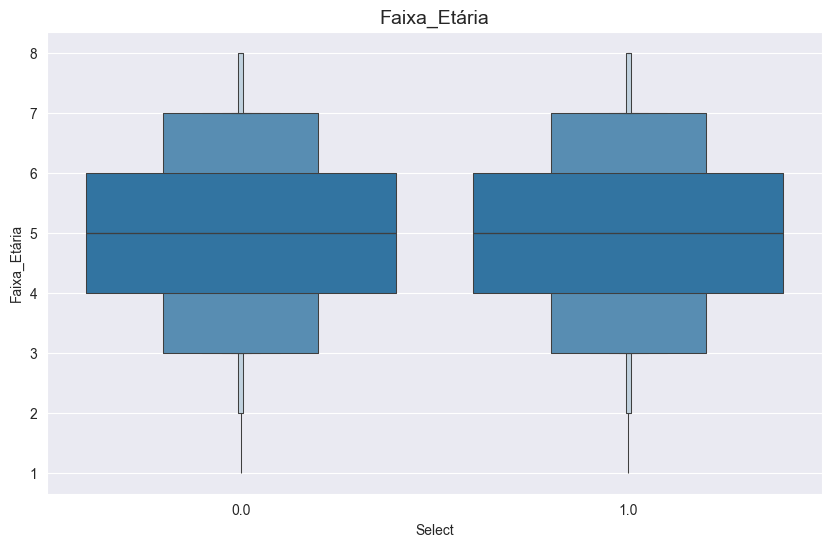

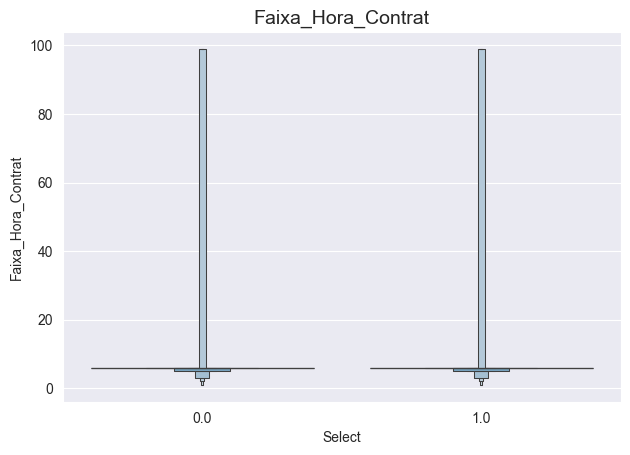

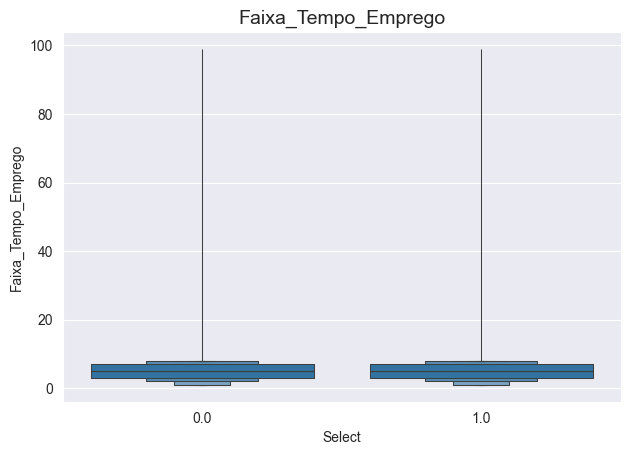

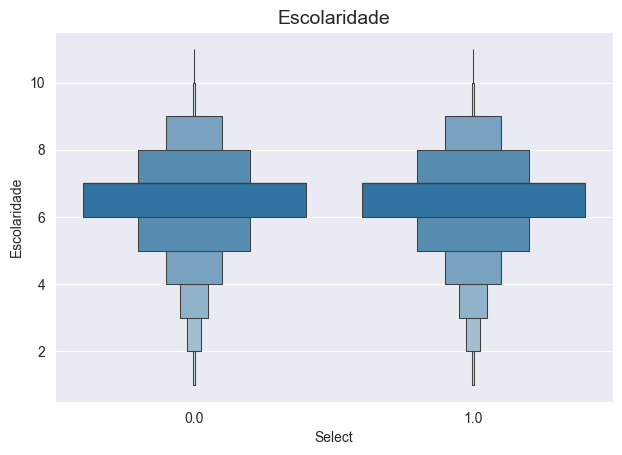

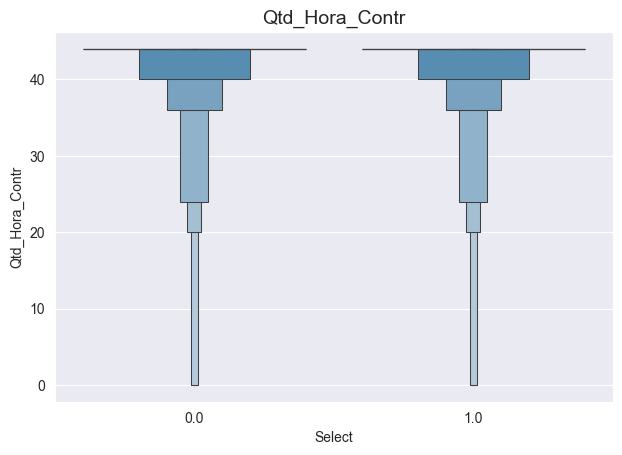

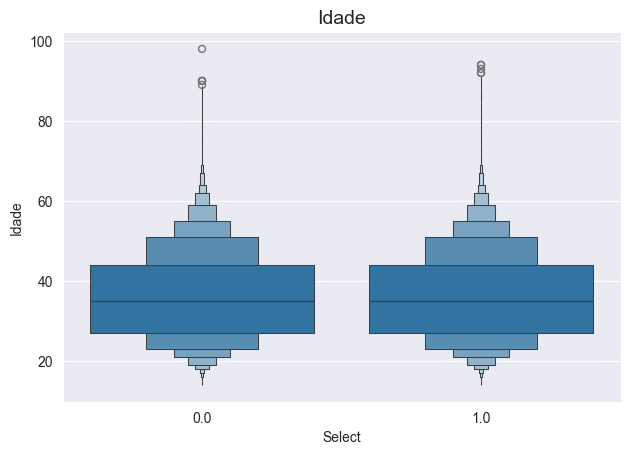

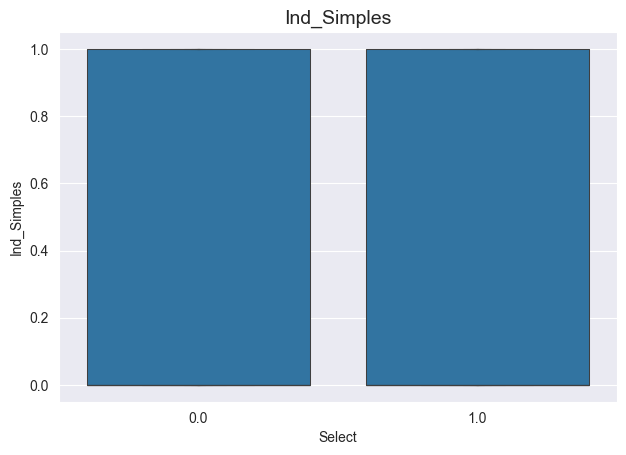

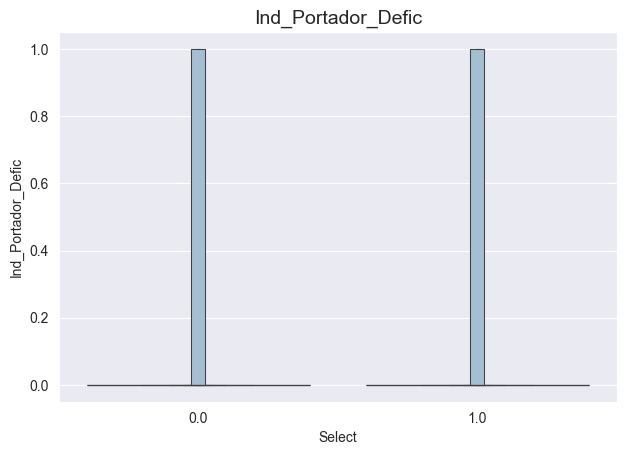

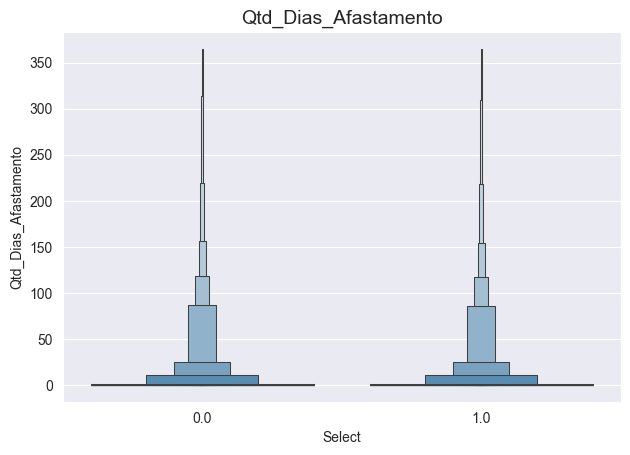

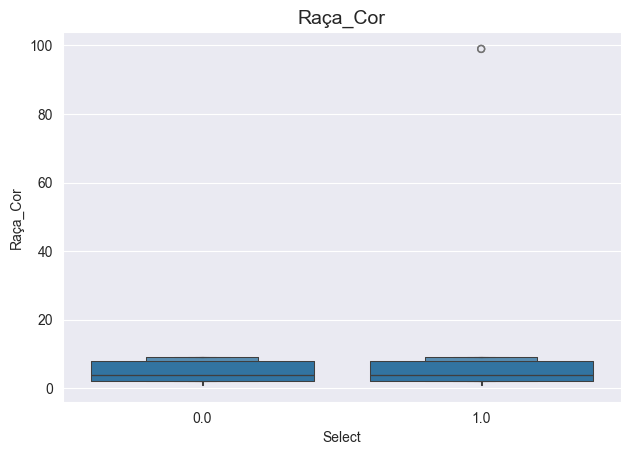

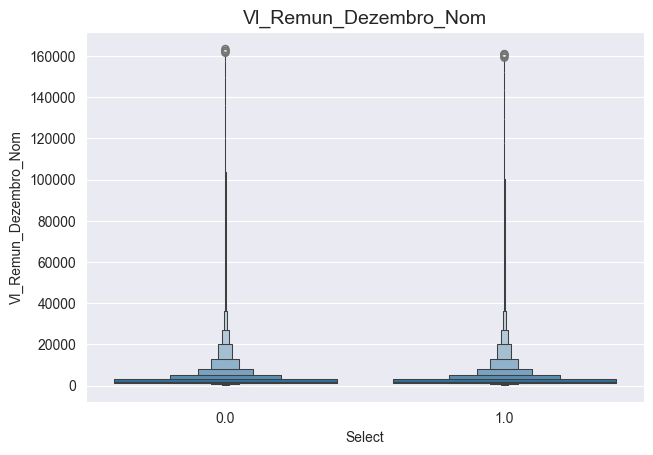

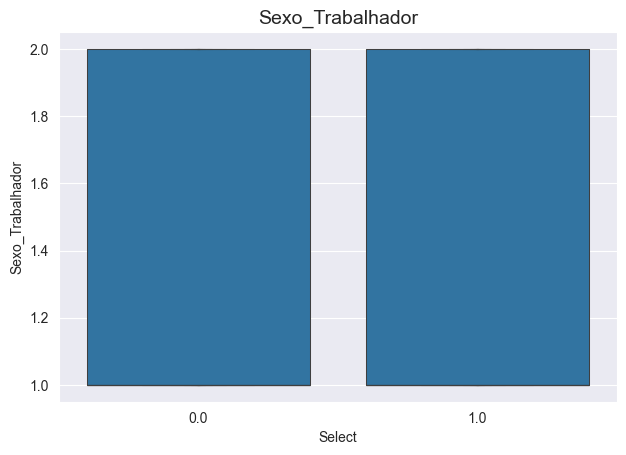

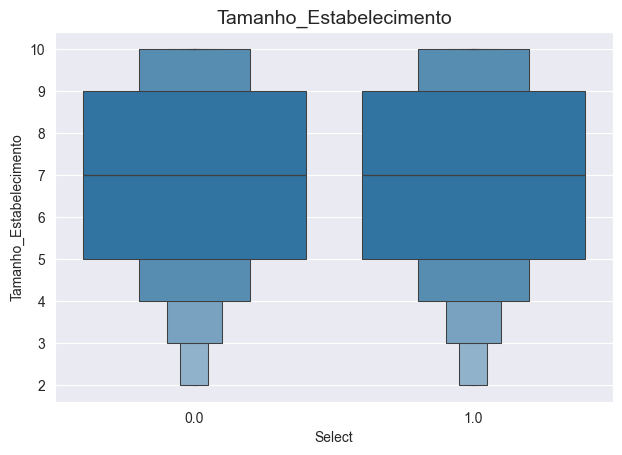

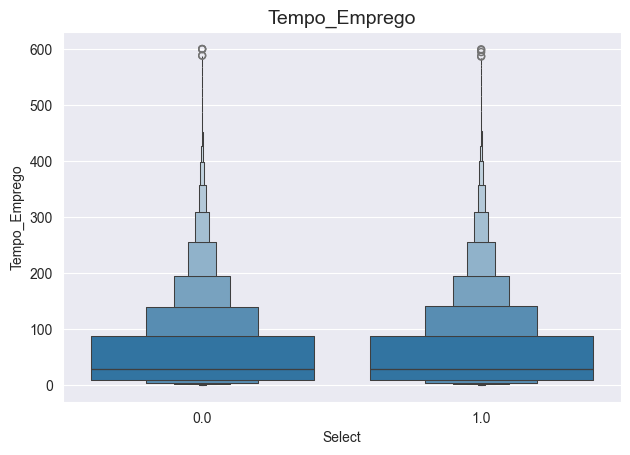

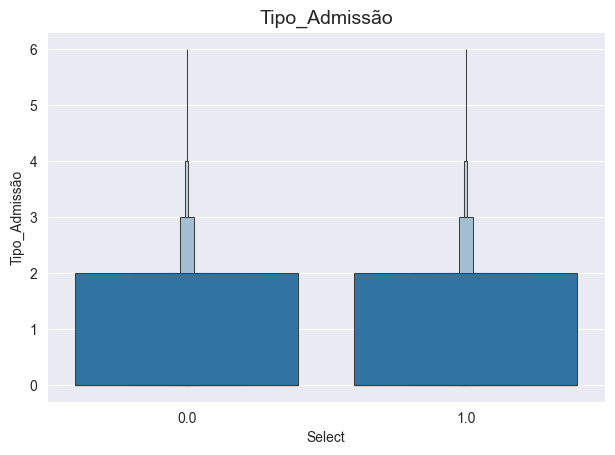

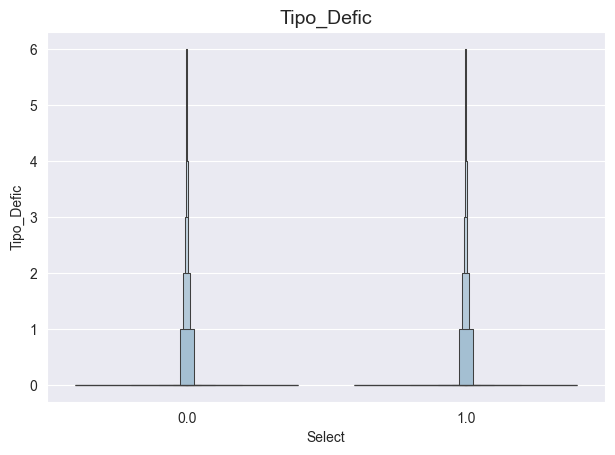

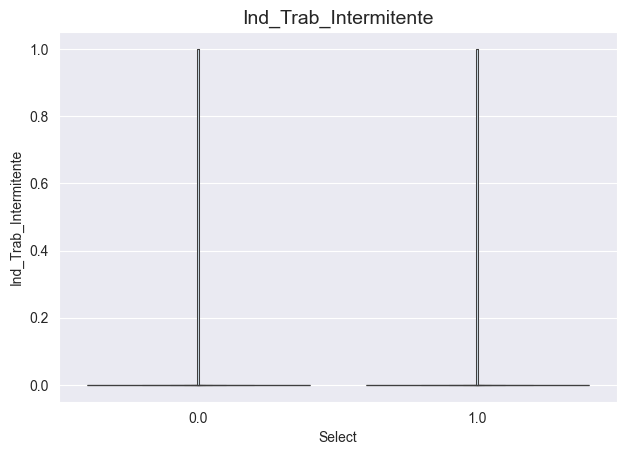

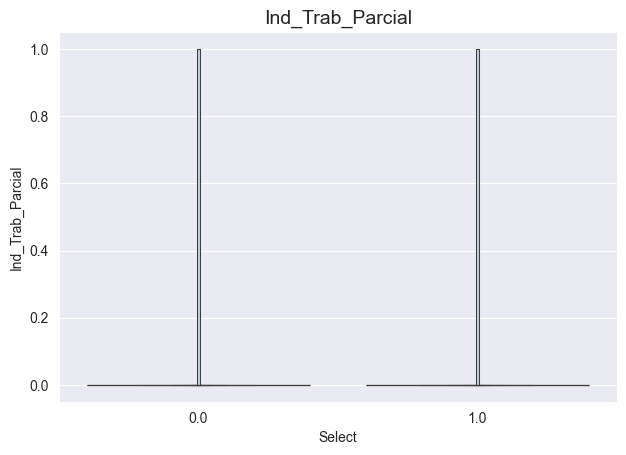

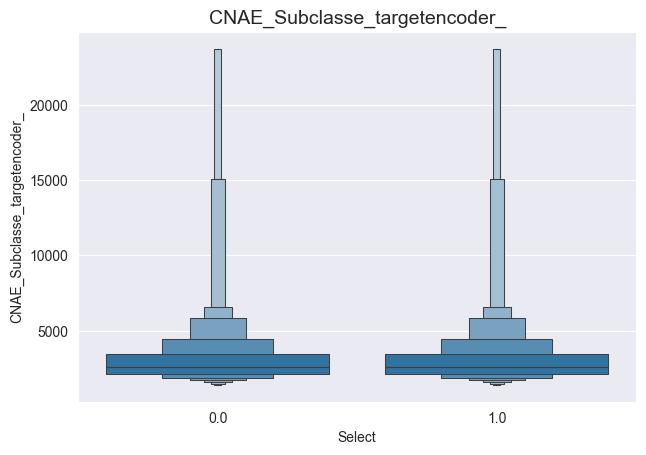

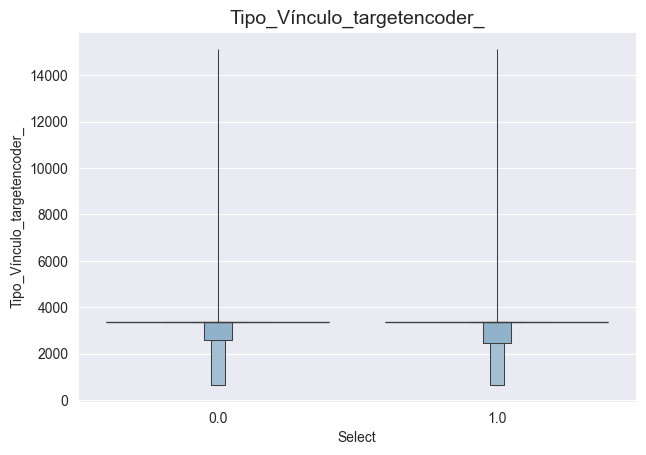

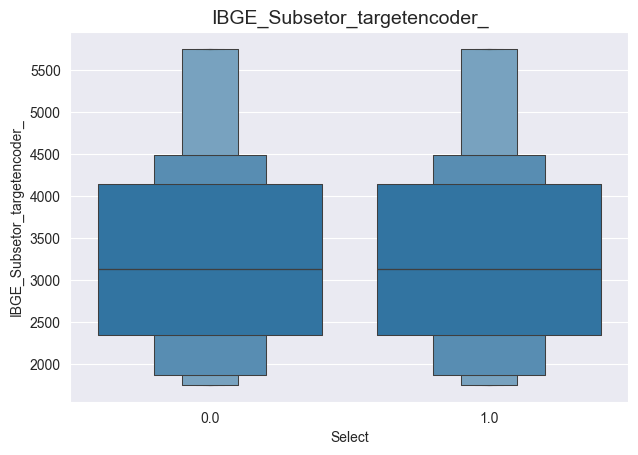

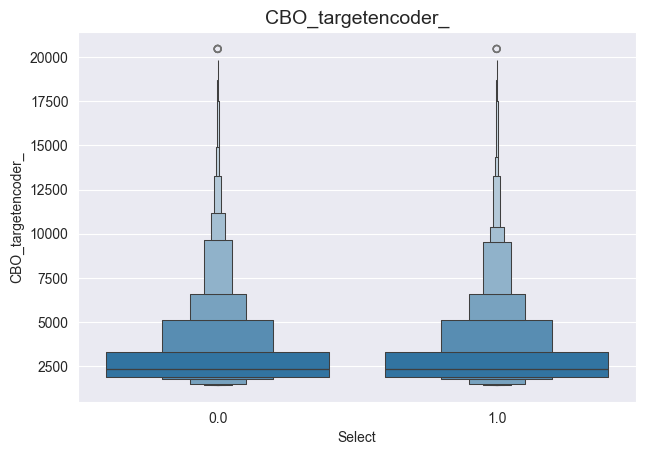

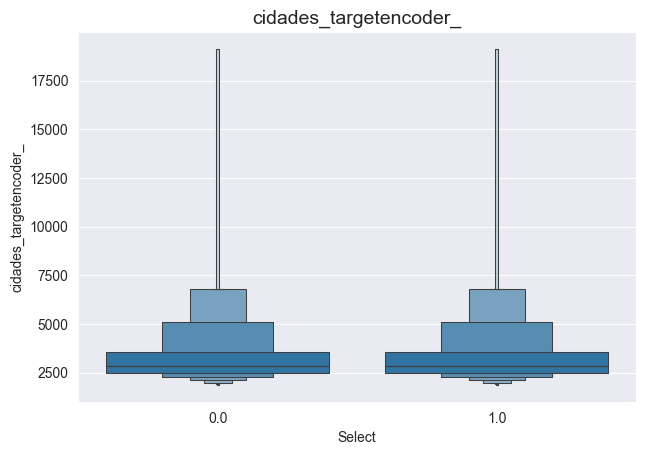

In [70]:
plt.figure(figsize=(10, 6))

for Names in lst_features: 
    ax = sns.boxenplot(data=df_ind_trans, x='Select', y=Names)
    ax.set_title(Names, fontdict={'fontsize': 14})
    plt.show()

In [71]:
df_ind_trans.head()

,id,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_,Select
0,0,7,6,3,1,44,50,1,0,0,4,1372.730,1,4,7.300,2,0,0,0,2012.803,3363.495,2012.400,2455.315,2662.986,1.000
1,1,7,1,6,1,1,61,0,0,20,2,1340.190,1,7,37.600,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,1.000
2,2,8,5,6,1,36,68,0,0,62,8,2263.800,1,7,38.900,0,0,0,0,3221.220,3363.495,4149.241,4420.601,3183.867,0.000
3,3,4,6,3,1,44,28,1,0,0,2,2083.360,1,3,6.100,2,0,0,0,2231.034,3363.495,1877.463,2210.861,1971.877,1.000
4,4,7,6,3,1,44,64,0,0,172,4,1417.420,1,6,9.600,2,0,0,0,3276.079,3363.495,4491.901,1583.565,2785.046,1.000


# Making Dataset de Train and Test

In [72]:
df_train = df_ind_trans[(df_ind_trans['Select'] == 1)]
df_test = df_ind_trans[(df_ind_trans['Select'] == 0)]
df_train.shape, df_test.shape

((573428, 25), (573429, 25))

In [73]:
df_train = df_train.drop(columns=['Select'])
df_test = df_test.drop(columns=['Select'])
df_train = df_train.set_index(['id'])
df_test = df_test.set_index(['id'])
df_train.shape, df_test.shape

((573428, 23), (573429, 23))

# View of Correlation

<Axes: >

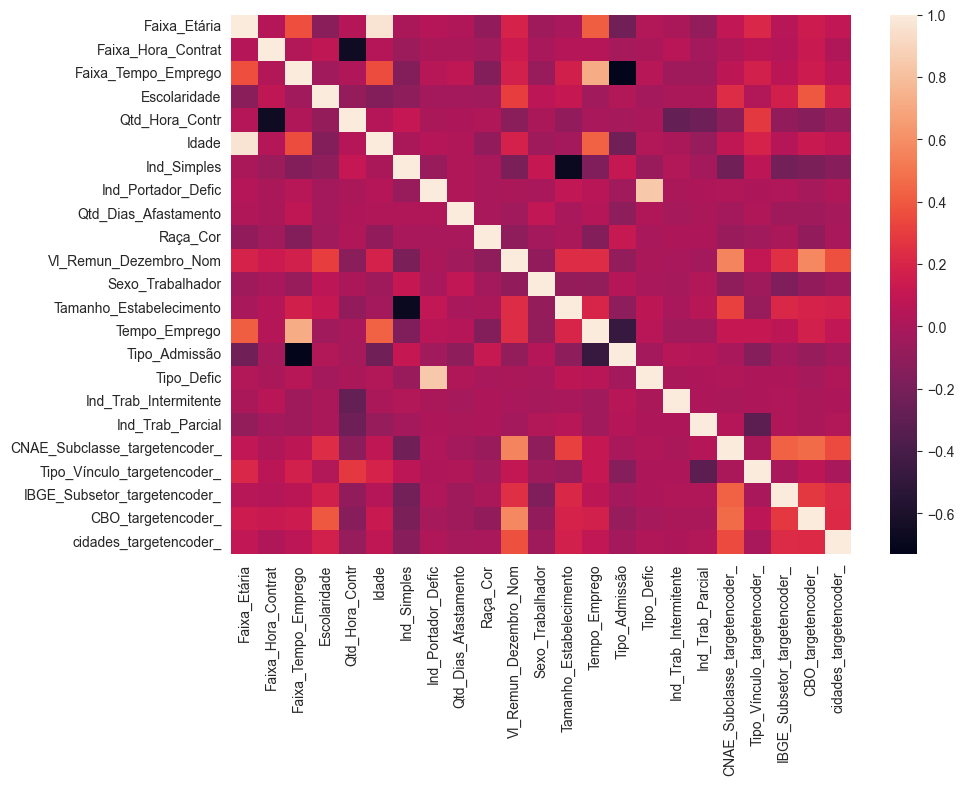

In [74]:
#plt.rcParams["figure.figsize"] = [20, 20]
plt.rcParams["figure.figsize"] = [10, 7]
cormat = df_train.corr()
#sns.heatmap(cormat, annot=True)
sns.heatmap(cormat)

# Separating the variables - first part

In [75]:
#feature scaling
sc = MinMaxScaler()
lst_column = df_train.columns.tolist()

for cols in lst_column: 
    df_train[cols] = sc.fit_transform(df_train[[cols]])

df_train.head()   

,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_
id,,,,,,,,,,,,,,,,,,,,,,,
0,0.857,0.051,0.020,0.000,1.000,0.450,1.000,0.000,0.000,0.031,0.006,0.000,0.250,0.012,0.333,0.000,0.000,0.000,0.027,0.187,0.064,0.053,0.046
1,0.857,0.000,0.051,0.000,0.023,0.588,0.000,0.000,0.055,0.010,0.006,0.000,0.625,0.063,0.000,0.000,0.000,0.000,0.081,0.187,0.599,0.156,0.076
3,0.429,0.051,0.020,0.000,1.000,0.175,1.000,0.000,0.000,0.010,0.011,0.000,0.125,0.010,0.333,0.000,0.000,0.000,0.037,0.187,0.030,0.040,0.006
4,0.857,0.051,0.020,0.000,1.000,0.625,0.000,0.000,0.471,0.031,0.007,0.000,0.500,0.016,0.333,0.000,0.000,0.000,0.084,0.187,0.685,0.007,0.053
5,0.571,0.051,0.020,0.000,1.000,0.250,1.000,0.000,0.000,0.010,0.005,0.000,0.125,0.020,0.167,0.000,0.000,0.000,0.003,0.187,0.150,0.007,0.025


# Training the GLM

## Version 1

In [84]:
df_train_mod_1 = df_train.copy()
df_train_mod_1 = df_train_mod_1[['Faixa_Hora_Contrat', 
       'Escolaridade', 'Qtd_Hora_Contr', 'Idade', 'Ind_Simples',
       'Ind_Portador_Defic', 'Qtd_Dias_Afastamento', 'Raça_Cor',
       'Vl_Remun_Dezembro_Nom', 'Sexo_Trabalhador', 'Tamanho_Estabelecimento',
       'Tempo_Emprego', 'Tipo_Admissão', 'Tipo_Defic', 'Ind_Trab_Intermitente',
       'Ind_Trab_Parcial']]
df_train_mod_1.shape

(573428, 16)

In [85]:
X = df_train_mod_1.drop(columns='Vl_Remun_Dezembro_Nom')
y = df_train_mod_1['Vl_Remun_Dezembro_Nom']
X.shape, y.shape

((573428, 15), (573428,))

In [86]:
mod_1 = sm.GLM(y, X, family=sm.families.Poisson(link=sm.families.links.log()))
res_1 = mod_1.fit()
display(res_1.summary())
# For the first question, you should look at the (P>|z|) column. If the absolute p-value is smaller than 0.05,
# it means that the feature affects Churn in a statistically significant way.

<class 'statsmodels.iolib.summary.Summary'>
"""
                   Generalized Linear Model Regression Results                   
=================================================================================
Dep. Variable:     Vl_Remun_Dezembro_Nom   No. Observations:               573428
Model:                               GLM   Df Residuals:                   573413
Model Family:                    Poisson   Df Model:                           14
Link Function:                       log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -46233.
Date:                   Mon, 24 Jun 2024   Deviance:                       10274.
Time:                           16:58:48   Pearson chi2:                 1.74e+04
No. Iterations:                        7   Pseudo R-squ. (CS):           0.003620
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Faixa_Hora_Contrat         -3.3138      0.065    -51.323      0.000      -3.440      -3.187
Escolaridade                1.0257      0.053     19.469      0.000       0.922       1.129
Qtd_Hora_Contr             -4.0663      0.036   -114.290      0.000      -4.136      -3.997
Idade                       0.6017      0.070      8.608      0.000       0.465       0.739
Ind_Simples                -0.8472      0.033    -25.967      0.000      -0.911      -0.783
Ind_Portador_Defic         -0.1198      0.140     -0.854      0.393      -0.394       0.155
Qtd_Dias_Afastamento       -0.9399      0.155     -6.079      0.000      -1.243      -0.637
Raça_Cor                   -7.3722      0.314    -23.474      0.000      -7.988      -6.757
Sexo_Trabalhador           -0.4639      0.024    -19.574      0.000      -0.510      -0.417
Tamanho_Estabelecimento    -0.2019      0.038     -5.336      0.000      -0.276      -0.128
Tempo_Emprego               0.8343      0.077     10.878      0.000       0.684       0.985
Tipo_Admissão              -0.7267      0.073     -9.917      0.000      -0.870      -0.583
Tipo_Defic                 -0.3608      0.320     -1.127      0.260      -0.989       0.267
Ind_Trab_Intermitente      -3.2817      0.215    -15.262      0.000      -3.703      -2.860
Ind_Trab_Parcial           -2.3789      0.184    -12.960      0.000      -2.739      -2.019
===========================================================================================
"""

In [87]:
np.exp(res_1.params)

Faixa_Hora_Contrat        0.036
Escolaridade              2.789
Qtd_Hora_Contr            0.017
Idade                     1.825
Ind_Simples               0.429
Ind_Portador_Defic        0.887
Qtd_Dias_Afastamento      0.391
Raça_Cor                  0.001
Sexo_Trabalhador          0.629
Tamanho_Estabelecimento   0.817
Tempo_Emprego             2.303
Tipo_Admissão             0.484
Tipo_Defic                0.697
Ind_Trab_Intermitente     0.038
Ind_Trab_Parcial          0.093
dtype: float64

In [88]:
random_ = 2023
X_train_res_1, X_test_res_1, y_train_res_1, y_test_res_1 = train_test_split(X , y, test_size=0.2, random_state=random_)
X_train_res_1.shape, X_test_res_1.shape, y_train_res_1.shape, y_test_res_1.shape

((458742, 15), (114686, 15), (458742,), (114686,))

In [89]:
y_pred_res_1= res_1.predict(X_test_res_1) 

In [90]:
res_1_diff = pd.DataFrame({'Actual value': y_test_res_1, 'Predicted value': y_pred_res_1})
res_1_diff.head(10)

,Actual value,Predicted value
id,,
757821,0.018,0.017
30697,0.014,0.013
1031813,0.011,0.011
693905,0.008,0.017
1138609,0.006,0.009
771161,0.033,0.019
191763,0.015,0.011
189156,0.009,0.014
901444,0.006,0.008


In [91]:
res_1_diff.describe()

,Actual value,Predicted value
count,114686.000,114686.000
mean,0.018,0.020
std,0.031,0.032
min,0.000,0.000
25%,0.007,0.009
50%,0.010,0.015
75%,0.018,0.023
max,0.959,3.700


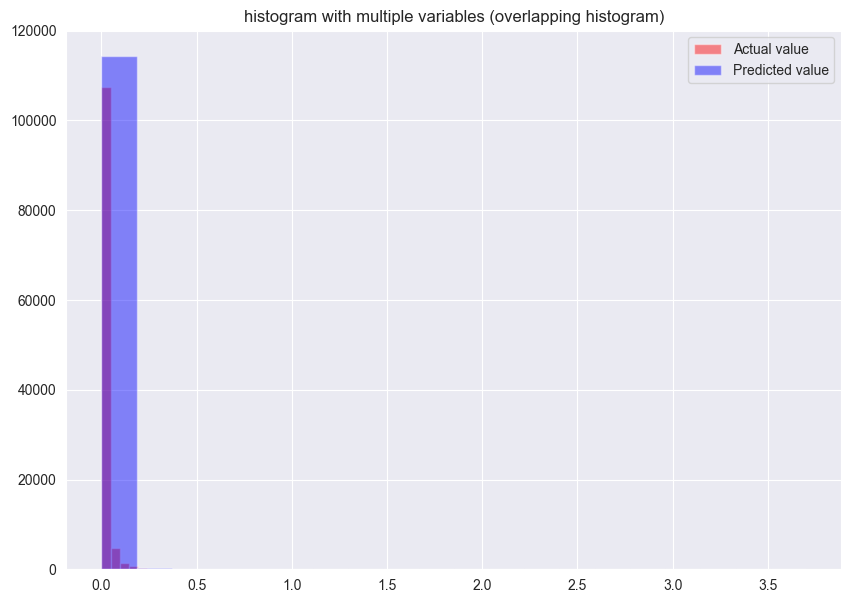

In [95]:
# plotting two histograms on the same axis 
plt.hist(res_1_diff['Actual value'], bins=20, alpha=0.45, color='red') 
plt.hist(res_1_diff['Predicted value'], bins=20, alpha=0.45, color='blue') 
plt.title("histogram with multiple variables (overlapping histogram)") 
plt.legend(['Actual value',  'Predicted value']) 
plt.show() 

In [96]:
mae_res_1 = metrics.mean_absolute_error(y_test_res_1, y_pred_res_1)
mse_res_1 = metrics.mean_squared_error(y_test_res_1, y_pred_res_1)
r2_res_1 = np.sqrt(metrics.mean_squared_error(y_test_res_1, y_pred_res_1))

print('Mean Absolute Error:', mae_res_1)
print('Mean Square Error:', mse_res_1)
print('Root Mean Square Error:', r2_res_1)

Mean Absolute Error: 0.013531563196294134
Mean Square Error: 0.0017117912044122975
Root Mean Square Error: 0.04137379852530219


## Version 2

In [98]:
df_train_mod_2 = df_train.copy()
df_train_mod_2 = df_train_mod_2[['Faixa_Etária', 'Faixa_Hora_Contrat', 'Faixa_Tempo_Emprego',
       'Escolaridade', 'Qtd_Hora_Contr', 'Idade', 'Ind_Simples',
       'Ind_Portador_Defic', 'Qtd_Dias_Afastamento', 'Raça_Cor',
       'Vl_Remun_Dezembro_Nom', 'Sexo_Trabalhador', 'Tamanho_Estabelecimento',
       'Tempo_Emprego', 'CNAE_Subclasse_targetencoder_',
       'Tipo_Vínculo_targetencoder_', 'IBGE_Subsetor_targetencoder_',
       'CBO_targetencoder_', 'cidades_targetencoder_']]
df_train_mod_2.shape

(573428, 19)

In [99]:
mod_2 = sm.OLS(y, X)    # Describe model
res_2 = mod_2.fit()       # Fit model
print(res_2.summary())   # Summarize model

                                  OLS Regression Results                                  
Dep. Variable:     Vl_Remun_Dezembro_Nom   R-squared (uncentered):                   0.417
Model:                               OLS   Adj. R-squared (uncentered):              0.417
Method:                    Least Squares   F-statistic:                          2.739e+04
Date:                   Mon, 24 Jun 2024   Prob (F-statistic):                        0.00
Time:                           17:07:16   Log-Likelihood:                      1.2367e+06
No. Observations:                 573428   AIC:                                 -2.473e+06
Df Residuals:                     573413   BIC:                                 -2.473e+06
Df Model:                             15                                                  
Covariance Type:               nonrobust                                                  
                              coef    std err          t      P>|t|      [0.025      0.975

In [100]:
np.exp(res_2.params)
# The second question about feature importances can be answered by looking at the exponential coefficient values. 
# The exponential coefficient estimates the expected change in *Vl_Remun_Dezembro_Nom* through a given feature by a change of one unit.
# This outputs the odd ratios. Values more than 1 indicate increased *Vl_Remun_Dezembro_Nom*. Values less than 1 indicate that *Vl_Remun_Dezembro_Nom* is happening less.

Faixa_Hora_Contrat        0.996
Escolaridade              1.061
Qtd_Hora_Contr            0.967
Idade                     1.038
Ind_Simples               0.999
Ind_Portador_Defic        0.996
Qtd_Dias_Afastamento      0.991
Raça_Cor                  0.936
Sexo_Trabalhador          0.994
Tamanho_Estabelecimento   1.016
Tempo_Emprego             1.034
Tipo_Admissão             1.004
Tipo_Defic                0.997
Ind_Trab_Intermitente     0.974
Ind_Trab_Parcial          0.981
dtype: float64

## Version 3

In [101]:
df_train.head()

,Faixa_Etária,Faixa_Hora_Contrat,Faixa_Tempo_Emprego,Escolaridade,Qtd_Hora_Contr,Idade,Ind_Simples,Ind_Portador_Defic,Qtd_Dias_Afastamento,Raça_Cor,Vl_Remun_Dezembro_Nom,Sexo_Trabalhador,Tamanho_Estabelecimento,Tempo_Emprego,Tipo_Admissão,Tipo_Defic,Ind_Trab_Intermitente,Ind_Trab_Parcial,CNAE_Subclasse_targetencoder_,Tipo_Vínculo_targetencoder_,IBGE_Subsetor_targetencoder_,CBO_targetencoder_,cidades_targetencoder_
id,,,,,,,,,,,,,,,,,,,,,,,
0,0.857,0.051,0.020,0.000,1.000,0.450,1.000,0.000,0.000,0.031,0.006,0.000,0.250,0.012,0.333,0.000,0.000,0.000,0.027,0.187,0.064,0.053,0.046
1,0.857,0.000,0.051,0.000,0.023,0.588,0.000,0.000,0.055,0.010,0.006,0.000,0.625,0.063,0.000,0.000,0.000,0.000,0.081,0.187,0.599,0.156,0.076
3,0.429,0.051,0.020,0.000,1.000,0.175,1.000,0.000,0.000,0.010,0.011,0.000,0.125,0.010,0.333,0.000,0.000,0.000,0.037,0.187,0.030,0.040,0.006
4,0.857,0.051,0.020,0.000,1.000,0.625,0.000,0.000,0.471,0.031,0.007,0.000,0.500,0.016,0.333,0.000,0.000,0.000,0.084,0.187,0.685,0.007,0.053
5,0.571,0.051,0.020,0.000,1.000,0.250,1.000,0.000,0.000,0.010,0.005,0.000,0.125,0.020,0.167,0.000,0.000,0.000,0.003,0.187,0.150,0.007,0.025


In [102]:
#Prepare it for the GLM formula
glm_columns = [e for e in df_train if e not in ['Vl_Remun_Dezembro_Nom']]
glm_columns = ' + '.join(map(str, glm_columns))
glm_columns

'Faixa_Etária + Faixa_Hora_Contrat + Faixa_Tempo_Emprego + Escolaridade + Qtd_Hora_Contr + Idade + Ind_Simples + Ind_Portador_Defic + Qtd_Dias_Afastamento + Raça_Cor + Sexo_Trabalhador + Tamanho_Estabelecimento + Tempo_Emprego + Tipo_Admissão + Tipo_Defic + Ind_Trab_Intermitente + Ind_Trab_Parcial + CNAE_Subclasse_targetencoder_ + Tipo_Vínculo_targetencoder_ + IBGE_Subsetor_targetencoder_ + CBO_targetencoder_ + cidades_targetencoder_'

In [103]:
#Fiting it to the Generalized Linear Model
mod_3 = smf.glm(formula=f'Vl_Remun_Dezembro_Nom ~ {glm_columns}', data = df_train, family=sm.families.Poisson())
res_3 = mod_3.fit()
print(res_3.summary())

                   Generalized Linear Model Regression Results                   
Dep. Variable:     Vl_Remun_Dezembro_Nom   No. Observations:               573428
Model:                               GLM   Df Residuals:                   573405
Model Family:                    Poisson   Df Model:                           22
Link Function:                       Log   Scale:                          1.0000
Method:                             IRLS   Log-Likelihood:                -42799.
Date:                   Mon, 24 Jun 2024   Deviance:                       3406.3
Time:                           17:08:18   Pearson chi2:                 4.35e+03
No. Iterations:                        6   Pseudo R-squ. (CS):            0.01548
Covariance Type:               nonrobust                                         
                                    coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------

In [96]:
np.exp(res_3.params)

Intercept                       183.769
Faixa_Etária                      1.125
Faixa_Hora_Contrat                1.006
Faixa_Tempo_Emprego               1.015
Escolaridade                      1.140
Qtd_Hora_Contr                    1.005
Idade                             1.000
Ind_Simples                       0.839
Ind_Portador_Defic                0.909
Qtd_Dias_Afastamento              0.999
Raça_Cor                          0.986
Sexo_Trabalhador                  0.818
Tamanho_Estabelecimento           1.039
Tempo_Emprego                     1.001
Tipo_Admissão                     1.001
Tipo_Defic                        0.982
Ind_Trab_Intermitente             0.980
Ind_Trab_Parcial                  0.681
CNAE_Subclasse_targetencoder_     1.000
Tipo_Vínculo_targetencoder_       1.000
IBGE_Subsetor_targetencoder_      1.000
CBO_targetencoder_                1.000
cidades_targetencoder_            1.000
dtype: float64